# Case Study: Collections                    <img src="logo.png" width="240" height="240" align="right" />

### By: Ibrokhim Sadikov




In [240]:
# Importing utility packages
import numpy as np
import pandas as pd
from IPython.display import display_html
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
import pickle
import gc
import lightgbm as lgb
import plotly.offline as py
import plotly.graph_objs as go
import shap
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing data 
xls = pd.ExcelFile('Collections Case Study Data.xlsx')
loan_detail_df = pd.read_excel(xls, 'Loan Details', index=False)
status_martomay_df = pd.read_excel(xls, 'Loan_Status_MartoMay', index=False)
loan_aprtojun_df = pd.read_excel(xls, 'Loan_Status_AprtoJun', index=False)
historical_df = pd.read_excel(xls, 'Historical 6 Months Details', index=False)
loan_idmap_df = pd.read_excel(xls, 'Loan_ID mapping', index=False)
call_detail_df = pd.read_excel(xls, 'Call Details', index=False)

#### QC: Displaying data

In [3]:
#Displaying dfs side by side

def display_sidebyside(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)



In [4]:
display_sidebyside(loan_detail_df.head(), status_martomay_df.head(), loan_aprtojun_df.head(), 
                   historical_df.head(), call_detail_df.head()  )

Loan_id 
 Debt_to_burden_Ratio 
 total_income 
 TENURE 
 Sanctioned Amount 
 
 
 
 
 0 
 A100005454 
 0.177021 
 7334734.0 
 36 
 30000000 
 
 
 1 
 A100026967 
 0.248750 
 6000000.0 
 48 
 38000000 
 
 
 2 
 A100040113 
 0.455961 
 11216760.0 
 48 
 105000000 
 
 
 3 
 A100080302 
 0.232607 
 5529077.0 
 48 
 33000000 
 
 
 4 
 A100104482 
 0.537601 
 15000000.0 
 48 
 120000000 
 
 
 
 
 
 
 Loan_id 
 Bucket 
 TENURE 
 PRINBALANCE 
 Months on Books 
 Sanctioned Amount 
 Month 
 
 
 
 
 0 
 A810487695 
 TB0 
 48 
 10539100.0 
 37 
 30000000 
 April 
 
 
 1 
 A205346000 
 TB0 
 36 
 3693500.0 
 33 
 22000000 
 March 
 
 
 2 
 A675851816 
 TB0 
 48 
 24353700.0 
 30 
 40000000 
 March 
 
 
 3 
 A810487695 
 TB0 
 48 
 9649000.0 
 38 
 30000000 
 May 
 
 
 4 
 A269873383 
 TB0 
 36 
 4441700.0 
 30 
 20000000 
 May 
 
 
 
 
 
 
 Loan_id 
 Bucket 
 PRINBALANCE 
 TENURE 
 Months on Books 
 Sanctioned Amount 
 Month 
 
 
 
 
 0 
 A810487695 
 TB0 
 9649000.0 
 48 
 38 
 30000000 
 May 
 
 
 1 
 A205346000 
 TB1 
 1332100.0 
 36 
 34 
 22000000 
 April 
 
 
 2 
 A675851816 
 TB1 
 20875500.0 
 48 
 31 
 40000000 
 April 
 
 
 3 
 A810487695 
 TB1 
 9648700.0 
 48 
 39 
 30000000 
 June 
 
 
 4 
 A269873383 
 REGULAR 
 2885800.0 
 36 
 31 
 20000000 
 June 
 
 
 
 
 
 
 Loan_id 
 paidcure 
 paiduncure 
 unpaid 
 rollb 
 rollf 
 num6mosdel 
 num3mosdel 
 num6mosdel_2plus 
 num3mosdel_2plus 
 max6del 
 max3del 
 Month 
 
 
 
 
 0 
 A810487695 
 2 
 1 
 3 
 1 
 0 
 5 
 2 
 4 
 2 
 5 
 5 
 April 
 
 
 1 
 A205346000 
 2 
 1 
 3 
 2 
 0 
 6 
 3 
 6 
 3 
 4 
 4 
 March 
 
 
 2 
 A675851816 
 2 
 1 
 3 
 0 
 0 
 4 
 3 
 3 
 3 
 4 
 4 
 March 
 
 
 3 
 A810487695 
 2 
 1 
 3 
 1 
 0 
 4 
 1 
 4 
 1 
 5 
 5 
 May 
 
 
 4 
 A269873383 
 2 
 1 
 3 
 1 
 0 
 4 
 2 
 3 
 2 
 4 
 4 
 May 
 
 
 
 
 
 
 month 
 Application_Id 
 Login_ID 
 Right_Party_Contact 
 Promise_to_pay 
 total_contacts 
 
 
 
 
 0 
 3 
 MX-100062359 
 AGNT50 
 1 
 1 
 1 
 
 
 1 
 3 
 MX-100095892 
 AGNT12 
 1 
 0 
 2 
 
 
 2 
 3 
 MX-100116696 
 AGNT36 
 2 
 0 
 3 
 
 
 3 
 3 
 MX-10011780 
 AGNT39 
 2 
 1 
 10 
 
 
 4 
 3 
 MX-100133826 
 AGNT48 
 4 
 3 
 17

#### QC:Shape of data-frames

In [5]:
print("Shape of loan_detail_df: ", loan_detail_df.shape)
print("Shape of status_martomay_df: ", status_martomay_df.shape)
print("Shape of loan_aprtojun_df: ", loan_aprtojun_df.shape)
print("Shape of historical_df: ", historical_df.shape)
print("Shape of call_detail_df: ", call_detail_df.shape)


Shape of loan_detail_df:  (40339, 5)
Shape of status_martomay_df:  (80769, 7)
Shape of loan_aprtojun_df:  (80769, 7)
Shape of historical_df:  (80769, 13)
Shape of call_detail_df:  (79614, 6)


####  QC: Checking for Missing and Duplicate values

In [6]:
print( "Number of Missing Values in loan_detail_df : \n",loan_detail_df.isnull().sum())
print("Number of Duplicates in loan_detail_df : \n", loan_detail_df.duplicated().sum())

Number of Missing Values in loan_detail_df : 
 Loan_id                 0
Debt_to_burden_Ratio    0
total_income            0
TENURE                  0
Sanctioned Amount       0
dtype: int64
Number of Duplicates in loan_detail_df : 
 0


In [7]:
print( "Number of Missing Values in status_martomay_df : \n",status_martomay_df.isnull().sum())
print("Number of Duplicates in status_martomay_df : \n", status_martomay_df.duplicated().sum())

Number of Missing Values in status_martomay_df : 
 Loan_id              0
Bucket               0
TENURE               0
PRINBALANCE          0
Months on Books      0
Sanctioned Amount    0
Month                0
dtype: int64
Number of Duplicates in status_martomay_df : 
 0


In [8]:
print( "Number of Missing Values in loan_aprtojun_df : \n", loan_aprtojun_df.isnull().sum())
print("Number of Duplicates in loan_aprtojun_df : \n", loan_aprtojun_df.duplicated().sum())

Number of Missing Values in loan_aprtojun_df : 
 Loan_id              0
Bucket               0
PRINBALANCE          0
TENURE               0
Months on Books      0
Sanctioned Amount    0
Month                0
dtype: int64
Number of Duplicates in loan_aprtojun_df : 
 0


In [9]:
print( "Number of Missing Values in historical_df : \n", historical_df.isnull().sum())
print("Number of Duplicates in historical_df : \n", historical_df.duplicated().sum())                   

Number of Missing Values in historical_df : 
 Loan_id             0
paidcure            0
paiduncure          0
unpaid              0
rollb               0
rollf               0
num6mosdel          0
num3mosdel          0
num6mosdel_2plus    0
num3mosdel_2plus    0
max6del             0
max3del             0
Month               0
dtype: int64
Number of Duplicates in historical_df : 
 0


In [10]:
print( "Number of Missing Values in call_detail_df : \n", call_detail_df.isnull().sum())
print("Number of Duplicates in call_detail_df : \n", call_detail_df.duplicated().sum()) 

#there was one duplicate thus removing it
call_detail_df.drop_duplicates(keep=False, inplace=True)

Number of Missing Values in call_detail_df : 
 month                  0
Application_Id         0
Login_ID               0
Right_Party_Contact    0
Promise_to_pay         0
total_contacts         0
dtype: int64
Number of Duplicates in call_detail_df : 
 1


### Level 1:  1.  What is the account roll forward rate for the months of Mar , Apr, May and June for TB0?

<i>As we know Roll rate is the proportion of customers who will be 'better'(roll backward rate), 'worse'(roll forward rate) or 'remain same' with time in terms of delinquency. For example, if 6% of 'No Due' customers moved to 0-29 DPD bucket, it means that 6% is calculated by dividing 'number of customers in 0-29 DPD at the end of 2nd Month, by 'total number of No Due customers at the end of 1st Month. 
- However, I was a bit concerned about the datasets for Loan statuses, as April and May statuses mismatch in two datasets for the same Loan_id. There might be bias in data or additional explanation should be provided regarding how report is generated 
- Also, question is a bit confusing regarding the part "for TB0", thus I provided two solutions, one to address change in the rate of TB0 month to month and second to actually solve for forward rate, Regular->TB0 </i>


In [11]:
# Joining two loan status data
loanstatus_join=pd.concat([status_martomay_df, loan_aprtojun_df ], sort=False, ignore_index=True)
print('Shape of loan status joined table:', loanstatus_join.shape)
print("Number of Duplicates : \n", loanstatus_join.duplicated().sum())
#removing duplicate rows
loanstatus_join=loanstatus_join.drop_duplicates()
print('Shape after removing duplicates:',loanstatus_join.shape )

Shape of loan status joined table: (161538, 7)
Number of Duplicates : 
 1385
Shape after removing duplicates: (160153, 7)


#### QC: Summary stats for joined loan status data

In [12]:
loanstatus_join.describe()

,TENURE,PRINBALANCE,Months on Books,Sanctioned Amount
count,160153.000000,1.601530e+05,160153.000000,1.601530e+05
mean,41.801103,3.290176e+07,16.064975,4.614849e+07
std,7.724550,2.412189e+07,10.628801,2.619721e+07
min,12.000000,2.000000e+02,0.000000,1.000000e+07
25%,36.000000,1.698640e+07,7.000000,3.000000e+07
50%,48.000000,2.845210e+07,15.000000,4.000000e+07
75%,48.000000,4.328710e+07,23.000000,5.500000e+07
max,240.000000,1.137036e+09,85.000000,1.300000e+09


In [13]:
# Subsetting only 4 columns
loanstatus_join=loanstatus_join[['Loan_id', 'Bucket', 'PRINBALANCE' ,'Month']]
loanstatus_join.head()

,Loan_id,Bucket,PRINBALANCE,Month
0,A810487695,TB0,10539100.0,April
1,A205346000,TB0,3693500.0,March
2,A675851816,TB0,24353700.0,March
3,A810487695,TB0,9649000.0,May
4,A269873383,TB0,4441700.0,May


In [14]:
#Subsetting only for March
status_march=loanstatus_join[loanstatus_join['Month']=='March']
status_march=status_march[['Loan_id', 'Bucket', 'PRINBALANCE' ]]
print(status_march.shape)
#status_march.head()

(24575, 3)


In [15]:
# Subsetting only for April
status_april=loanstatus_join[loanstatus_join['Month']=='April']
status_april=status_april[['Loan_id', 'Bucket', 'PRINBALANCE' ]]
print(status_april.shape)
#status_april.head()

(50932, 3)


In [16]:
# Subsetting only for May
status_may=loanstatus_join[loanstatus_join['Month']=='May']
status_may=status_may[['Loan_id', 'Bucket', 'PRINBALANCE' ]]
print(status_may.shape)
#status_may.head()

(55531, 3)


In [17]:
# Subsetting only for June
status_jun=loanstatus_join[loanstatus_join['Month']=='June']
status_jun=status_jun[['Loan_id', 'Bucket', 'PRINBALANCE' ]]
print(status_jun.shape)
#status_jun.head()

(29115, 3)


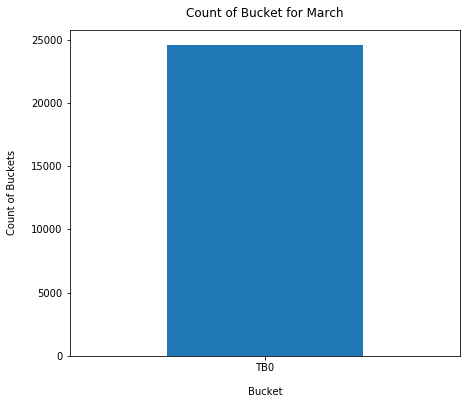

In [18]:
status_march['Bucket'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Bucket", labelpad=14)
plt.ylabel("Count of Buckets", labelpad=14)
plt.title("Count of Bucket for March", y=1.02);

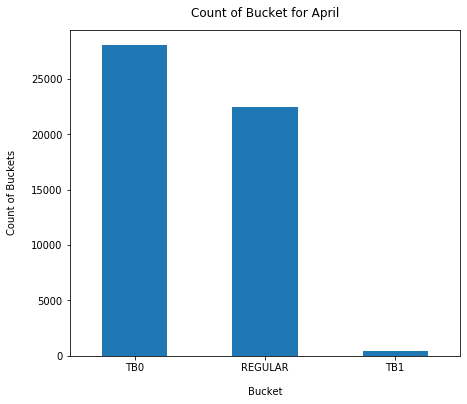

In [19]:
status_april['Bucket'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Bucket", labelpad=14)
plt.ylabel("Count of Buckets", labelpad=14)
plt.title("Count of Bucket for April", y=1.02);

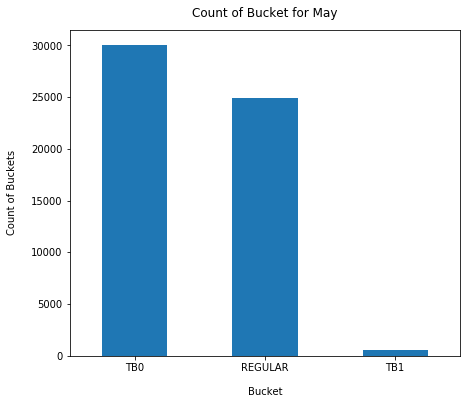

In [20]:
status_may['Bucket'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Bucket", labelpad=14)
plt.ylabel("Count of Buckets", labelpad=14)
plt.title("Count of Bucket for May", y=1.02);

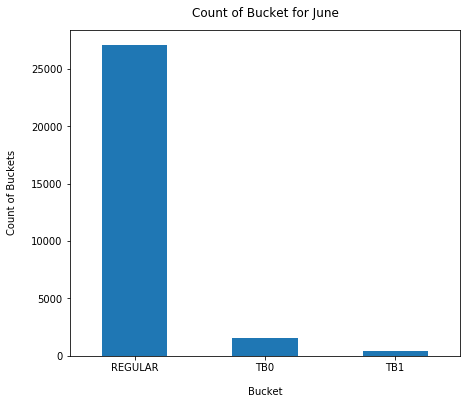

In [21]:
status_jun['Bucket'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Bucket", labelpad=14)
plt.ylabel("Count of Buckets", labelpad=14)
plt.title("Count of Bucket for June", y=1.02);

In [22]:
c1=100*status_april[status_april['Bucket']=='TB0'].shape[0]/status_march.shape[0]
c2=100*status_may[status_may['Bucket']=='TB0'].shape[0]/status_april[status_april['Bucket']=='TB0'].shape[0]
c3=100*status_jun[status_jun['Bucket']=='TB0'].shape[0]/status_may[status_may['Bucket']=='TB0'].shape[0]
data = {'March-April %':  [c1],'April-May %': [c2], 'May-June %': [c3] }
df1 = pd.DataFrame (data, columns = ['March-April %','April-May %','May-June %'])
df1

,March-April %,April-May %,May-June %
0,114.205493,106.983539,5.252115


In [23]:
a1=100*status_april[(status_april['Bucket']=='TB0')|(status_april['Bucket']=='TB1')].shape[0]/status_march.shape[0]
a2=100*status_may[status_may['Bucket']=='TB0'].shape[0]/status_april[status_april['Bucket']=='REGULAR'].shape[0]
a3=100*status_jun[status_jun['Bucket']=='TB0'].shape[0]/status_may[status_may['Bucket']=='REGULAR'].shape[0]
data = {'March-April %':  [a1],'April-May %': [a2], 'May-June %': [a3] }
df2 = pd.DataFrame (data, columns = ['March-April %','April-May %','May-June %'])
df2

,March-April %,April-May %,May-June %
0,115.796541,133.59733,6.317097


### LEVEL 1:    2. What is the Princple outstanding balance roll forward rate for the same months as above for TB0?

<i>To my understanding, when considering delinquency roll rates by balances, a bank will base their calculations on total delinquent balances. For instance, if the 60-day delinquent balance for a small bank's credit card portfolio in February is 100 million, and the 90-day delinquent balance for March is 40 million, the 60-to-90 day roll-rate in March is 40% (i.e., 40 divided to 100 million). This implies that 40% of the 100 million receivables in the 60-day bucket in February have migrated to the 90-day bucket in March.</i>

In [24]:
v1=100*(status_april[(status_april['Bucket']=='TB0')|(status_april['Bucket']=='TB1')]['PRINBALANCE'].sum()/status_march['PRINBALANCE'].sum())
v2=100*(status_may[(status_may['Bucket']=='TB0')|(status_may['Bucket']=='TB1')]['PRINBALANCE'].sum()/status_april[(status_april['Bucket']=='TB0')]['PRINBALANCE'].sum())
v3=100*(status_jun[(status_jun['Bucket']=='TB0')|(status_jun['Bucket']=='TB1')]['PRINBALANCE'].sum()/status_may[(status_may['Bucket']=='TB0')]['PRINBALANCE'].sum())
data = {'March-April %':  [v1],'April-May %': [v2], 'May-June %': [v3] }
df3 = pd.DataFrame (data, columns = ['March-April %','April-May %','May-June %'])
df3

,March-April %,April-May %,May-June %
0,113.23364,110.840032,4.969195


#### LEVEL 1:   3.What is the average attempt intensity, RPC rate and PTP rate on accounts for the months of mar, Apr and May

In [25]:
#Average attempt per each month
March_attempt=call_detail_df[call_detail_df['month']==3]['total_contacts'].mean()
April_attempt=call_detail_df[call_detail_df['month']==4]['total_contacts'].mean()
May_attempt=call_detail_df[call_detail_df['month']==5]['total_contacts'].mean()

In [26]:
#Average RPC per each month
March_rpc=call_detail_df[call_detail_df['month']==3]['Right_Party_Contact'].mean()
April_rpc=call_detail_df[call_detail_df['month']==4]['Right_Party_Contact'].mean()
May_rpc=call_detail_df[call_detail_df['month']==5]['Right_Party_Contact'].mean()

In [27]:
#Average PTP per each month
March_ptp=call_detail_df[call_detail_df['month']==3]['Promise_to_pay'].mean()
April_ptp=call_detail_df[call_detail_df['month']==4]['Promise_to_pay'].mean()
May_ptp=call_detail_df[call_detail_df['month']==5]['Promise_to_pay'].mean()

In [28]:
data = {'March Avg':  [March_attempt,March_rpc,March_ptp],'April Avg': [April_attempt,April_rpc,April_ptp], 'May Avg': [May_attempt,May_rpc,May_ptp] }
df4= pd.DataFrame (data, columns = ['March Avg','April Avg','May Avg'],index=['total_contacts','Right_Party_Contact','Promise_to_pay'])
df4

,March Avg,April Avg,May Avg
total_contacts,12.125772,10.511585,10.457885
Right_Party_Contact,3.334019,3.136668,3.181682
Promise_to_pay,1.198120,1.109439,1.058678


### LEVEL 2:   2. Is there any correlation between the princple balance remaining and the term completed

In [29]:
loanstatus_merge=pd.concat([status_martomay_df, loan_aprtojun_df ], sort=False, ignore_index=True).drop_duplicates()
loanstatus_merge['Term_Completed']=loanstatus_merge['Months on Books']/loanstatus_merge['TENURE']
loanstatus_merge[['PRINBALANCE','Term_Completed']].corr()

,PRINBALANCE,Term_Completed
PRINBALANCE,1.000000,-0.569316
Term_Completed,-0.569316,1.000000


### LEVEL 2:        3.	Identify the agents who are showing the best and worst performance

#### QC: Discriptive stats for Call details data

In [30]:
# Our main goal is to derive some KPI from data so that we can come up with metrics to evaluate performance of agents
# First of all, we can look at correlation among Total_contacts, RPC and PTP
# we have to keep in mind Correlation Does Not Imply Causation, Correlation between two variables indicates that 
#changes in one variable are associated with changes in the other variable. 
#However, correlation does not mean that the changes in one variable actually cause the changes in the other variable.

corr=call_detail_df[['Right_Party_Contact','Promise_to_pay', 'total_contacts']].corr()
corr.style.background_gradient(cmap='viridis').set_precision(2)

#We can observe moderate positive correlation among RPC-total_contacts and RPC-PTP, while total contacts-RPC has more stronger positive corr

,Right_Party_Contact,Promise_to_pay,total_contacts
Right_Party_Contact,1,0.39,0.54
Promise_to_pay,0.39,1,0.34
total_contacts,0.54,0.34,1


In [31]:
print('Number of Agents: ', call_detail_df['Login_ID'].nunique())

Number of Agents:  114


In [32]:
#Summary stats
call_detail_df.describe()

,month,Right_Party_Contact,Promise_to_pay,total_contacts
count,79612.000000,79612.000000,79612.000000,79612.000000
mean,4.040195,3.213925,1.119203,10.995202
std,0.813131,6.639111,1.490002,21.288990
min,3.000000,0.000000,0.000000,1.000000
25%,3.000000,1.000000,0.000000,2.000000
50%,4.000000,2.000000,1.000000,4.000000
75%,5.000000,4.000000,2.000000,11.000000
max,5.000000,651.000000,25.000000,659.000000


#### KPI 1: Number of cases being worked per collector for the period

<i>This KPI shows the total number of active borrowers, a collection employee is handling at a given time in relation to the total number of borrower the business has. If a collection employee is handling more cases, he will be more efficient in the use of his time and recources to recover the business debts. </i>

Text(0.5, 1.0, 'Number of Cases being worked per Agent March-May: Top-30 Agents')

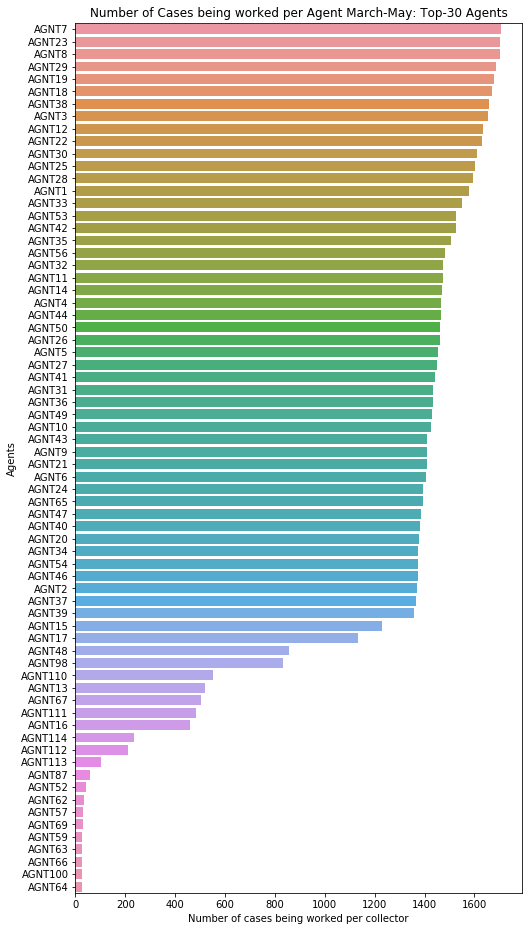

In [33]:
d=call_detail_df['Login_ID'].value_counts()
contract_df = pd.DataFrame({'Agents': d.index,'Number of cases being worked per collector': d.values})
v=contract_df.head(70)
f, ax = plt.subplots(figsize=(8,16))
sns.set_color_codes("pastel")
ax=sns.barplot(x='Number of cases being worked per collector', y='Agents', data=v)
ax.set_title('Number of Cases being worked per Agent March-May: Top-30 Agents')

#### KPI 2: Percentage of Outbound Calls Resulting in Right Party Contacts (RPC) rate
<i>It is a more specific metrics in the measurement of efficiency in  debt recovery. RPC will measure the ratio of all outbound calls that were made to the person who owes to the lender. A higher number, in this case, means more requests were made to the right party, and this shows a high success rate in locating debtors. RPC works on the notion that being able to identify, place a call and connect to the correct person is the very first successful step in recovering business debts and being an efficient collector. If, on the other hand, the collectors  as a whole have an RPC rate that is lower than other agents, it shows that there is not enough being done to recover debt for the organization. 
    
PS:If this number is very low, it may be that you have a problem with identifying or contacting the right person, and you could consider adjusting your strategy around this. Maybe you could try asking for multiple contact details earlier in the buying process. Thus, there could be a bias that Agent just was unlucky to reach wrong person <i/>



Text(0.5, 1.0, 'Ranking of Agents by RPC rate')

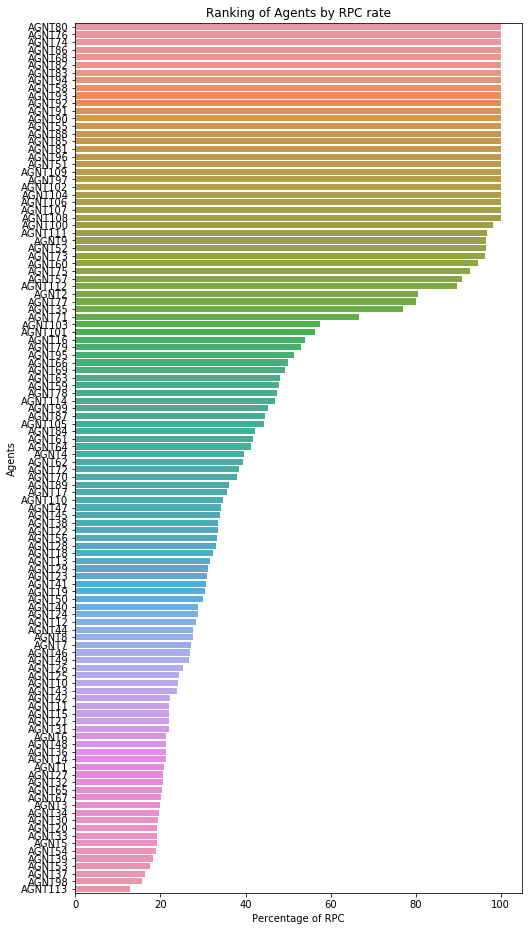

In [34]:
rpc=100*call_detail_df.groupby('Login_ID', sort=True)['Right_Party_Contact'].sum()/call_detail_df.groupby('Login_ID')['total_contacts'].sum()
rpc_df = pd.DataFrame({'Agents': rpc.index,'Percentage of RPC': rpc.values})
rpc_df=rpc_df.sort_values(by = ['Percentage of RPC'], ascending=[False])
f, ax1 = plt.subplots(figsize=(8,16))
sns.set_color_codes("pastel")
ax1=sns.barplot(x='Percentage of RPC', y='Agents', data=rpc_df)
ax1.set_title('Ranking of Agents by RPC rate')

#### KPI 3: Percentage of Outbound Calls Resulting in Promise to Pay (PTP)
<i>PTP is another significant rate in determining your overall collector efficiency. Making a call successfully to a debtor is a major step in recovering debts. For the collector, getting a promise to pay at the end of the call is a better step. PTP is measured in percentages, and it shows the percentage of all calls that have been made to a debtor that ends with a promise to pay the debt.

Collectors should work towards keeping this percentage as close to 100 as possible. This would be a more accurate measure of proficiency in recovering the debt. If an individual collector’s rates are lower than others sharing a similar scope, it means there is room for improvement on as far as debt recovery in the organization is concerned.<i/>



Text(0.5, 1.0, 'Ranking of Agents by Outbound Calls Resulting in Promise to Pay (PTP)')

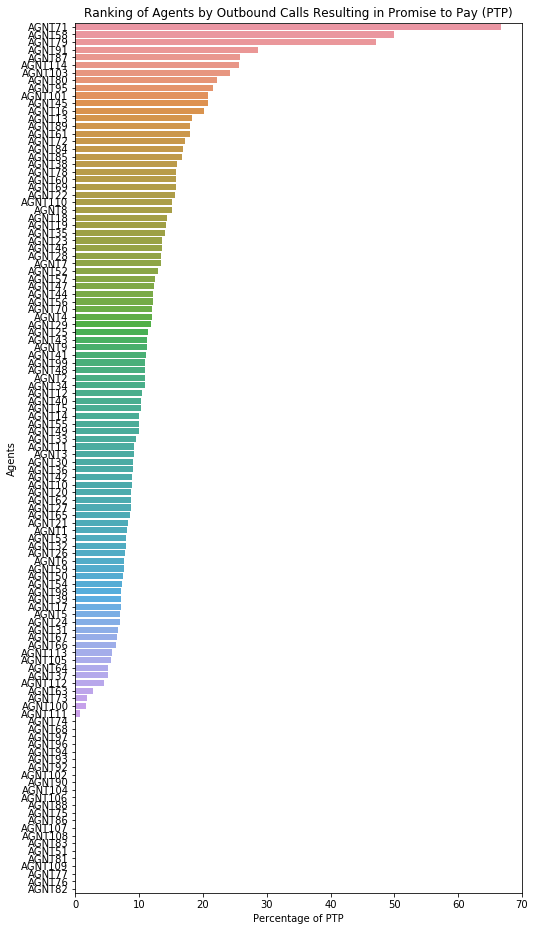

In [35]:
ptp=100*call_detail_df.groupby('Login_ID', sort=True)['Promise_to_pay'].sum()/call_detail_df.groupby('Login_ID')['total_contacts'].sum()
ptp_df = pd.DataFrame({'Agents': ptp.index,'Percentage of PTP': ptp.values})
ptp_df=ptp_df.sort_values(by = ['Percentage of PTP'], ascending=[False])
f, ax2 = plt.subplots(figsize=(8,16))
sns.set_color_codes("pastel")
ax2=sns.barplot(x='Percentage of PTP', y='Agents', data=ptp_df)
ax2.set_title('Ranking of Agents by Outbound Calls Resulting in Promise to Pay (PTP)')

####  QC : Plotting Distributions of Consumer Total Income and Sancationed Amount

Text(0.5, 1.0, 'Distribution of Sanctioned (Approved) Amount')

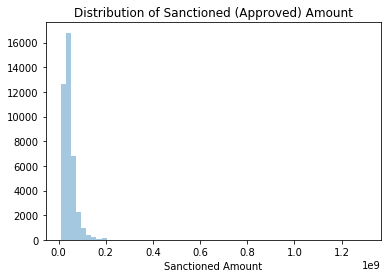

In [36]:
#Plotting dstibution of Sanctioned amount

v=sns.distplot(loan_detail_df["Sanctioned Amount"], bins=60, kde=False)
v.set_title('Distribution of Sanctioned (Approved) Amount')


Text(0.5, 1.0, 'Total Income of Consumer')

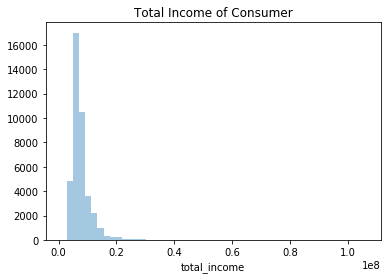

In [37]:
#Plotting Distribution Consumer Income
loan_detail_df.drop(loan_detail_df['total_income'].idxmax(), inplace=True)
loan_detail_df.drop(loan_detail_df['total_income'].idxmax(), inplace=True)
loan_detail_df.drop(loan_detail_df['total_income'].idxmax(), inplace=True)
loan_detail_df.drop(loan_detail_df['total_income'].idxmax(), inplace=True)
fig2 = sns.distplot(loan_detail_df["total_income"],bins=50, kde=False)
fig2.set_title('Total Income of Consumer')


#### QC: Additional EDA with joining tables, transformations, feature extractions 

In [38]:
#Merging mapping df with call detail df
Call_idmap_mrg = pd.merge(call_detail_df, loan_idmap_df, left_on='Application_Id', right_on='Application_id').reset_index()
Call_idmap_mrg=Call_idmap_mrg[['Loanid', 'Login_ID','total_contacts', 'Right_Party_Contact', 'Promise_to_pay', 'month']]
Call_idmap_mrg=Call_idmap_mrg.rename(columns={'Loanid': "Loan_id"})
Call_idmap_mrg.head()

,Loan_id,Login_ID,total_contacts,Right_Party_Contact,Promise_to_pay,month
0,A730581847,AGNT50,1,1,1,3
1,A134412216,AGNT12,2,1,0,3
2,A897161619,AGNT36,3,2,0,3
3,A897161619,AGNT4,5,3,2,4
4,A897161619,AGNT11,2,0,0,5


In [39]:
historical_df.describe()

,paidcure,paiduncure,unpaid,rollb,rollf,num6mosdel,num3mosdel,num6mosdel_2plus,num3mosdel_2plus,max6del,max3del
count,80769.000000,80769.000000,80769.000000,80769.000000,80769.0,80769.000000,80769.000000,80769.000000,80769.000000,80769.00000,80769.000000
mean,5.319578,0.029219,0.068764,0.052805,0.0,0.175005,0.124144,0.007986,0.003714,0.11024,0.098342
std,1.389551,0.181921,0.264863,0.247906,0.0,0.670356,0.430435,0.151420,0.076840,0.33456,0.311912
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,5.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,6.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,6.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,6.000000,3.000000,3.000000,4.000000,0.0,6.000000,3.000000,6.000000,3.000000,5.00000,5.000000


In [49]:
# Dropping rollf column because of null values
historical_df_new=historical_df.drop(['rollf'], axis=1)
#Plotting correlation matrix for historical data
corr2=historical_df_new.corr()
corr2.style.background_gradient(cmap='viridis').set_precision(2)

,paidcure,paiduncure,unpaid,rollb,num6mosdel,num3mosdel,num6mosdel_2plus,num3mosdel_2plus,max6del,max3del
paidcure,1,-0.076,-0.26,-0.064,-0.18,-0.27,-0.036,-0.044,-0.35,-0.37
paiduncure,-0.076,1,0.052,0.62,0.51,0.42,0.23,0.22,0.5,0.39
unpaid,-0.26,0.052,1,0.37,0.29,0.4,0.15,0.19,0.47,0.49
rollb,-0.064,0.62,0.37,1,0.52,0.42,0.27,0.2,0.62,0.5
num6mosdel,-0.18,0.51,0.29,0.52,1,0.9,0.32,0.29,0.78,0.75
num3mosdel,-0.27,0.42,0.4,0.42,0.9,1,0.21,0.24,0.83,0.89
num6mosdel_2plus,-0.036,0.23,0.15,0.27,0.32,0.21,1,0.83,0.38,0.31
num3mosdel_2plus,-0.044,0.22,0.19,0.2,0.29,0.24,0.83,1,0.34,0.35
max6del,-0.35,0.5,0.47,0.62,0.78,0.83,0.38,0.34,1,0.93
max3del,-0.37,0.39,0.49,0.5,0.75,0.89,0.31,0.35,0.93,1


In [44]:
historical_df_new['max6del']= historical_df_new['max6del'].replace([2], 1)
historical_df_new['max6del']= historical_df_new['max6del'].replace([3], 1)
historical_df_new['max6del']= historical_df_new['max6del'].replace([4], 1)
historical_df_new['max6del']= historical_df_new['max6del'].replace([5], 1)

In [50]:
#Number of unique accounts in historical data
print('Number of Unique Accounts on historical data: ', historical_df['Loan_id'].nunique())

Number of Unique Accounts on historical data:  40339


In [51]:
#Combining/aggregating features.
grp = historical_df_new.drop('Month', axis =1).groupby(by=['Loan_id']).mean().reset_index()
# Shape of historical data after aggr
print('The shape of Historical data after aggr:',grp.shape)

The shape of Historical data after aggr: (40339, 11)


In [53]:
grp['max6del']= grp['max6del']> 0

In [54]:
grp['max6del'].value_counts()

False    34201
True      6138
Name: max6del, dtype: int64

In [222]:
#Joining Historical data with loan detail data
df_model = grp.merge(loan_detail_df, on='Loan_id', how='left')
# Shape of joined data
print('The shape of Historical data joined with loan detail data:',df_model.shape)
df_model.head()

The shape of Historical data joined with loan detail data: (40339, 15)


,Loan_id,paidcure,paiduncure,unpaid,rollb,num6mosdel,num3mosdel,num6mosdel_2plus,num3mosdel_2plus,max6del,max3del,Debt_to_burden_Ratio,total_income,TENURE,Sanctioned Amount
0,A100005454,6.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,False,0.000000,0.177021,7334734.0,36.0,30000000.0
1,A100026967,6.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,False,0.000000,0.248750,6000000.0,48.0,38000000.0
2,A100040113,2.0,0.0,0.0,0.0,0.333333,0.333333,0.0,0.0,True,0.333333,0.455961,11216760.0,48.0,105000000.0
3,A100080302,6.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,False,0.000000,0.232607,5529077.0,48.0,33000000.0
4,A100104482,6.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,False,0.000000,0.537601,15000000.0,48.0,120000000.0


In [223]:
# Column to represent Credit Income Percent
df_model['CREDIT_INCOME_Ratio'] = df_model['Sanctioned Amount'] / df_model['total_income']

# Flag to represent when Total income is greater than Credit
df_model['INCOME_GT_CREDIT_FLAG'] = df_model['total_income'] > df_model['Sanctioned Amount']
df_model.head()

,Loan_id,paidcure,paiduncure,unpaid,rollb,num6mosdel,num3mosdel,num6mosdel_2plus,num3mosdel_2plus,max6del,max3del,Debt_to_burden_Ratio,total_income,TENURE,Sanctioned Amount,CREDIT_INCOME_Ratio,INCOME_GT_CREDIT_FLAG
0,A100005454,6.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,False,0.000000,0.177021,7334734.0,36.0,30000000.0,4.090128,False
1,A100026967,6.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,False,0.000000,0.248750,6000000.0,48.0,38000000.0,6.333333,False
2,A100040113,2.0,0.0,0.0,0.0,0.333333,0.333333,0.0,0.0,True,0.333333,0.455961,11216760.0,48.0,105000000.0,9.360992,False
3,A100080302,6.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,False,0.000000,0.232607,5529077.0,48.0,33000000.0,5.968446,False
4,A100104482,6.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,False,0.000000,0.537601,15000000.0,48.0,120000000.0,8.000000,False


In [224]:
# Combining numerical features
temp= Call_idmap_mrg.drop(['Login_ID', 'month'], axis =1).groupby(by=['Loan_id']).sum()
#joining call data with main data
df_model = df_model.merge(temp, on =['Loan_id'], how = 'left')
df_model.update(df_model[temp.columns].fillna(0))
df_model=df_model.dropna()

In [225]:
df_model.head()

,Loan_id,paidcure,paiduncure,unpaid,rollb,num6mosdel,num3mosdel,num6mosdel_2plus,num3mosdel_2plus,max6del,max3del,Debt_to_burden_Ratio,total_income,TENURE,Sanctioned Amount,CREDIT_INCOME_Ratio,INCOME_GT_CREDIT_FLAG,total_contacts,Right_Party_Contact,Promise_to_pay
0,A100005454,6.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,False,0.000000,0.177021,7334734.0,36.0,30000000.0,4.090128,False,8.0,5.0,3.0
1,A100026967,6.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,False,0.000000,0.248750,6000000.0,48.0,38000000.0,6.333333,False,158.0,7.0,1.0
2,A100040113,2.0,0.0,0.0,0.0,0.333333,0.333333,0.0,0.0,True,0.333333,0.455961,11216760.0,48.0,105000000.0,9.360992,False,66.0,11.0,3.0
3,A100080302,6.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,False,0.000000,0.232607,5529077.0,48.0,33000000.0,5.968446,False,66.0,46.0,2.0
4,A100104482,6.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,False,0.000000,0.537601,15000000.0,48.0,120000000.0,8.000000,False,4.0,4.0,2.0


In [226]:
df_model.dtypes

Loan_id                   object
paidcure                 float64
paiduncure               float64
unpaid                   float64
rollb                    float64
num6mosdel               float64
num3mosdel               float64
num6mosdel_2plus         float64
num3mosdel_2plus         float64
max6del                     bool
max3del                  float64
Debt_to_burden_Ratio     float64
total_income             float64
TENURE                   float64
Sanctioned Amount        float64
CREDIT_INCOME_Ratio      float64
INCOME_GT_CREDIT_FLAG       bool
total_contacts           float64
Right_Party_Contact      float64
Promise_to_pay           float64
dtype: object

In [227]:
df_model["max6del"] =df_model["max6del"].astype(int)
df_model["INCOME_GT_CREDIT_FLAG"] =df_model["INCOME_GT_CREDIT_FLAG"].astype(int)
df_model.head()

,Loan_id,paidcure,paiduncure,unpaid,rollb,num6mosdel,num3mosdel,num6mosdel_2plus,num3mosdel_2plus,max6del,max3del,Debt_to_burden_Ratio,total_income,TENURE,Sanctioned Amount,CREDIT_INCOME_Ratio,INCOME_GT_CREDIT_FLAG,total_contacts,Right_Party_Contact,Promise_to_pay
0,A100005454,6.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0,0.000000,0.177021,7334734.0,36.0,30000000.0,4.090128,0,8.0,5.0,3.0
1,A100026967,6.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0,0.000000,0.248750,6000000.0,48.0,38000000.0,6.333333,0,158.0,7.0,1.0
2,A100040113,2.0,0.0,0.0,0.0,0.333333,0.333333,0.0,0.0,1,0.333333,0.455961,11216760.0,48.0,105000000.0,9.360992,0,66.0,11.0,3.0
3,A100080302,6.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0,0.000000,0.232607,5529077.0,48.0,33000000.0,5.968446,0,66.0,46.0,2.0
4,A100104482,6.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0,0.000000,0.537601,15000000.0,48.0,120000000.0,8.000000,0,4.0,4.0,2.0


In [228]:
df_model['max6del'].value_counts()

0    34198
1     6137
Name: max6del, dtype: int64

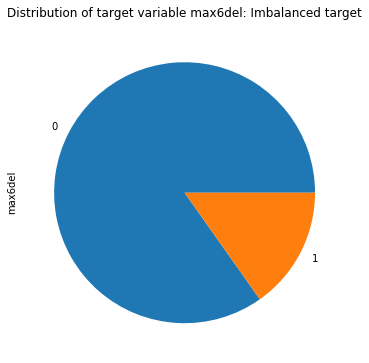

In [229]:
df_model['max6del'].value_counts().plot(kind='pie', figsize=(7, 6), rot=0)
plt.title("Distribution of target variable max6del: Imbalanced target", y=1.02);

## Level 3: Building Classifier Model

We have selected max6del as the target column. If max6del=0 than it is no risk customer while max6del>0 than it is riskier client and thus classified as 1

#### Splitting Data into Train, Validation and Test sets

In [230]:
# Train test validation split
y = df_model.pop('max6del').values
y=y.astype('int')
X_train, X_temp, y_train, y_temp = train_test_split(df_model.drop(['Loan_id'],axis=1), y, stratify = y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, stratify = y_temp, test_size=0.5, random_state=42)
print('Shape of X_train:',X_train.shape)
print('Shape of X_val:',X_val.shape)
print('Shape of X_test:',X_test.shape)


Shape of X_train: (28234, 18)
Shape of X_val: (6050, 18)
Shape of X_test: (6051, 18)


In [231]:
## Scaling our data so that it would avoid bias as we have features which are very sparse such as total income and sanctioned amount
cols=X_train.columns
scaler_num = StandardScaler()
X_train = scaler_num.fit_transform(X_train)
X_val = scaler_num.transform(X_val)
X_test = scaler_num.transform(X_test)
X_train_final = pd.DataFrame(X_train, columns=cols)
X_val_final = pd.DataFrame(X_val, columns=cols)
X_test_final = pd.DataFrame(X_test, columns=cols)

#### Generating Feature Importance Plot

In [235]:
#Selection of features
model_sk = lgb.LGBMClassifier(boosting_type='gbdt', max_depth=7, learning_rate=0.01, n_estimators= 2000, 
                 class_weight='balanced', subsample=0.9, colsample_bytree= 0.8, n_jobs=-1)
train_features, valid_features, train_y, valid_y = train_test_split(X_train_final, y_train, test_size = 0.15, random_state = 42)
model_sk.fit(train_features, train_y, early_stopping_rounds=100, eval_set = [(valid_features, valid_y)], eval_metric = 'auc', verbose = 200)

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 1	valid_0's binary_logloss: 0.67346


LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=0.8, importance_type='split',
               learning_rate=0.01, max_depth=7, min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=2000,
               n_jobs=-1, num_leaves=31, objective=None, random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=0.9,
               subsample_for_bin=200000, subsample_freq=0)

In [236]:
feature_imp = pd.DataFrame(sorted(zip(model_sk.feature_importances_, X_train_final.columns)), columns=['Value','Feature'])
features_df = feature_imp.sort_values(by="Value", ascending=False)

In [237]:
# Feature importance Plot
data1 = features_df.head(10)
data = [go.Bar(x =data1.sort_values(by='Value')['Value'] , y = data1.sort_values(by='Value')['Feature'], orientation = 'h',
              marker = dict(
        color = 'rgba(43, 13, 150, 0.6)',
        line = dict(
            color = 'rgba(43, 13, 150, 1.0)',
            width = 1.5)
    )) ]
layout = go.Layout(
    autosize=False,
    width=1300,
    height=700,
    title = "Top 10 important features",
    xaxis=dict(
        title='Importance value'
        ),
    yaxis=dict(
        automargin=True
        ),
    bargap=0.4
    )
fig = go.Figure(data = data, layout=layout)
fig.layout.template = 'seaborn'
py.iplot(fig)

### Functions to plot Confusion matrix and AUC curve

In [238]:
def plot_confusion_matrix(test_y, predicted_y):
    # Confusion matrix
    C = confusion_matrix(test_y, predicted_y)
    
    # Recall matrix
    A = (((C.T)/(C.sum(axis=1))).T)
    
    # Precision matrix
    B = (C/C.sum(axis=0))
    
    plt.figure(figsize=(20,4))
    
    labels = ['Re-paid(0)','Not Re-paid(1)']
    cmap=sns.light_palette("orange")
    plt.subplot(1,3,1)
    sns.heatmap(C, annot=True, cmap=cmap,fmt="d", xticklabels = labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Orignal Class')
    plt.title('Confusion matrix')
    
    plt.subplot(1,3,2)
    sns.heatmap(A, annot=True, cmap=cmap, xticklabels = labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Orignal Class')
    plt.title('Recall matrix')
    
    plt.subplot(1,3,3)
    sns.heatmap(B, annot=True, cmap=cmap, xticklabels = labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Orignal Class')
    plt.title('Precision matrix')
    
    plt.show()
def cv_plot(alpha, cv_auc):
    
    fig, ax = plt.subplots()
    ax.plot(np.log10(alpha), cv_auc,c='g')
    for i, txt in enumerate(np.round(cv_auc,3)):
        ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_auc[i]))
    plt.grid()
    plt.xticks(np.log10(alpha))
    plt.title("Cross Validation Error for each alpha")
    plt.xlabel("Alpha i's")
    plt.ylabel("Error measure")
    plt.show()

### Logistic regression :

Logistic Regression finds a hyperplane which best seperates the given positive and negative data points.

For alpha 0.0001, cross validation AUC score 0.9999987287058225
For alpha 0.001, cross validation AUC score 0.9998987202305281
For alpha 0.01, cross validation AUC score 0.9999953385880159
For alpha 0.1, cross validation AUC score 0.9998949063479956
For alpha 1.0, cross validation AUC score 0.5
For alpha 10.0, cross validation AUC score 0.5
For alpha 100.0, cross validation AUC score 0.5
For alpha 1000.0, cross validation AUC score 0.5
For alpha 10000.0, cross validation AUC score 0.5


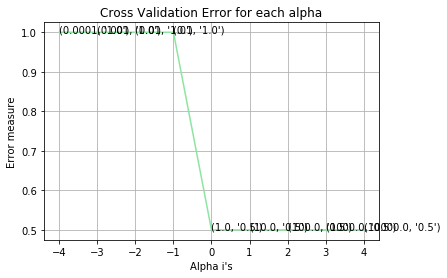

The Optimal C value is: 0.0001


In [241]:
alpha = np.logspace(-4,4,9)
cv_auc_score = []
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1',class_weight = 'balanced', loss='log', random_state=28)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method='sigmoid')
    sig_clf.fit(X_train_final, y_train)
    y_pred_prob = sig_clf.predict_proba(X_val_final)[:,1]
    cv_auc_score.append(roc_auc_score(y_val,y_pred_prob))
    print('For alpha {0}, cross validation AUC score {1}'.format(i,roc_auc_score(y_val,y_pred_prob)))
cv_plot(alpha, cv_auc_score)
print('The Optimal C value is:', alpha[np.argmax(cv_auc_score)])

For best alpha 0.0001, The Train AUC score is 0.9999989984212786
For best alpha 0.0001, The Cross validated AUC score is 0.9999987287058225
For best alpha 0.0001, The Test AUC score is 0.9999991533907758
The test AUC score is : 0.9999991533907758
The percentage of misclassified points 00.08% :


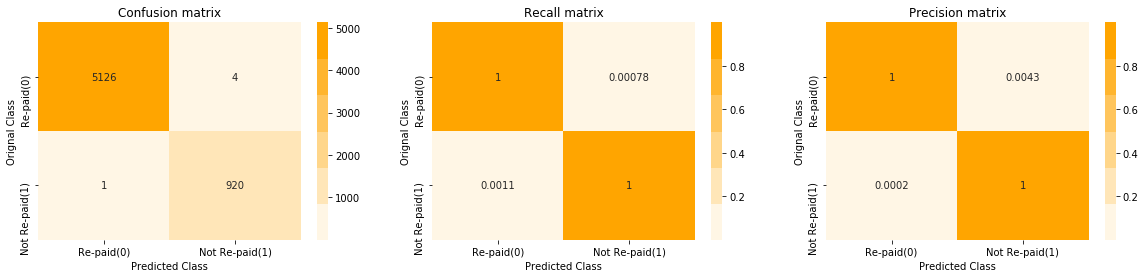

In [243]:
best_alpha = alpha[np.argmax(cv_auc_score)]
logreg = SGDClassifier(alpha = best_alpha, class_weight = 'balanced', penalty = 'l1', loss='log', random_state = 28)
logreg.fit(X_train_final, y_train)
logreg_sig_clf = CalibratedClassifierCV(logreg, method='sigmoid')
logreg_sig_clf.fit(X_train_final, y_train)
y_pred_prob = logreg_sig_clf.predict_proba(X_train_final)[:,1]
print('For best alpha {0}, The Train AUC score is {1}'.format(best_alpha, roc_auc_score(y_train,y_pred_prob) ))    
y_pred_prob = logreg_sig_clf.predict_proba(X_val_final)[:,1]
print('For best alpha {0}, The Cross validated AUC score is {1}'.format(best_alpha, roc_auc_score(y_val,y_pred_prob) ))  
y_pred_prob = logreg_sig_clf.predict_proba(X_test_final)[:,1]
print('For best alpha {0}, The Test AUC score is {1}'.format(best_alpha, roc_auc_score(y_test,y_pred_prob) ))
y_pred = logreg.predict(X_test_final)
print('The test AUC score is :', roc_auc_score(y_test,y_pred_prob))
print('The percentage of misclassified points {:05.2f}% :'.format((1-accuracy_score(y_test, y_pred))*100))
plot_confusion_matrix(y_test, y_pred)

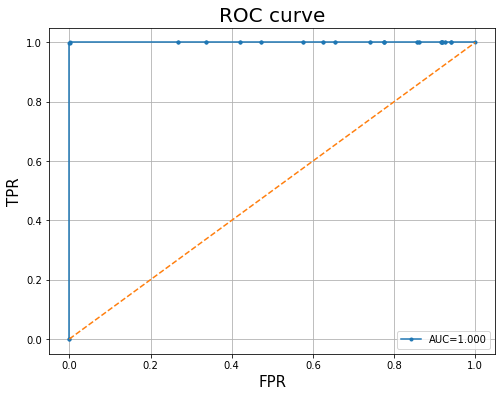

In [244]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test,y_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC curve', fontsize = 20)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.grid()
plt.legend(["AUC=%.3f"%auc])
plt.show()


### Fitting to LightGBM :

<i>Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks.

Since it is based on decision tree algorithms, it splits the tree leaf wise with the best fit whereas other boosting algorithms split the tree depth wise or level wise rather than leaf-wise. So when growing on the same leaf in Light GBM, the leaf-wise algorithm can reduce more loss than the level-wise algorithm and hence results in much better accuracy which can rarely be achieved by any of the existing boosting algorithms. Also, it is surprisingly very fast, hence the word ‘Light’. </i>

Training until validation scores don't improve for 100 rounds
[10]	valid_0's auc: 1
[20]	valid_0's auc: 1
[30]	valid_0's auc: 1
[40]	valid_0's auc: 1
[50]	valid_0's auc: 1
[60]	valid_0's auc: 1
[70]	valid_0's auc: 1
[80]	valid_0's auc: 1
[90]	valid_0's auc: 1
[100]	valid_0's auc: 1
Early stopping, best iteration is:
[2]	valid_0's auc: 1
For  max_depth 10 and some other parameters, cross validation AUC score 1.0
The optimal  max_depth:  3
Training until validation scores don't improve for 100 rounds
[10]	valid_0's auc: 1
[20]	valid_0's auc: 1
[30]	valid_0's auc: 1
[40]	valid_0's auc: 1
[50]	valid_0's auc: 1
[60]	valid_0's auc: 1
[70]	valid_0's auc: 1
[80]	valid_0's auc: 1
[90]	valid_0's auc: 1
[100]	valid_0's auc: 1
Early stopping, best iteration is:
[2]	valid_0's auc: 1
For best max_depth 3, The Train AUC score is 1.0
For best max_depth 3, The Cross validated AUC score is 1.0
For best max_depth 3, The Test AUC score is 1.0
The test AUC score is : 1.0
The percentage of misclassified poi

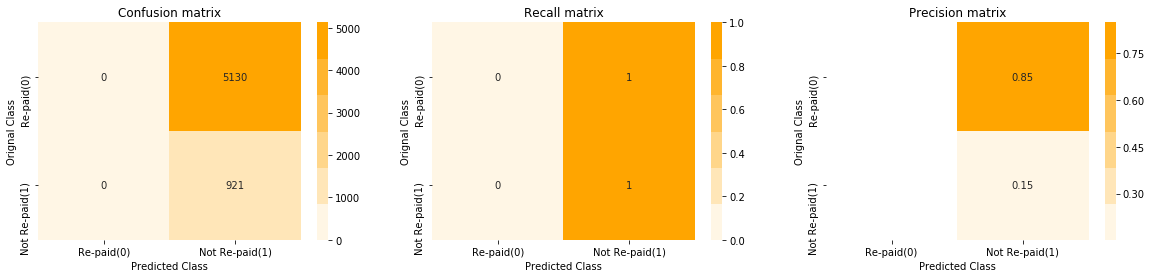

In [245]:
weight = np.ones((len(X_train_final),), dtype=int)
for i in range(len(X_train_final)):
    if y_train[i]== 0:
        weight[i]=1
    else:
        weight[i]=11

train_data=lgb.Dataset(X_train_final, label = y_train, weight= weight )
valid_data=lgb.Dataset(X_val_final, label = y_val)
cv_auc_score = []
max_depth = [3, 5, 7, 10]
for i in max_depth:
    
    params = {'boosting_type': 'gbdt',
          'max_depth' : i,
          'objective': 'binary',
          'nthread': 5,
          'num_leaves': 32,
          'learning_rate': 0.05,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 0.7,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 20,
          'reg_lambda': 20,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 10,
          'scale_pos_weight': 1,
          'num_class' : 1,
          'metric' : 'auc'
          }
lgbm = lgb.train(params,
                 train_data,
                 2500,
                 valid_sets=valid_data,
                 early_stopping_rounds= 100,
                 verbose_eval= 10
                 )
y_pred_prob = lgbm.predict(X_val_final)
cv_auc_score.append(roc_auc_score(y_val,y_pred_prob))
print('For  max_depth {0} and some other parameters, cross validation AUC score {1}'.format(i,roc_auc_score(y_val,y_pred_prob)))
print('The optimal  max_depth: ', max_depth[np.argmax(cv_auc_score)])
params = {'boosting_type': 'gbdt',
          'max_depth' : max_depth[np.argmax(cv_auc_score)],
          'objective': 'binary',
          'nthread': 5,
          'num_leaves': 32,
          'learning_rate': 0.05,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 0.7,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 20,
          'reg_lambda': 20,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 10,
          'scale_pos_weight': 1,
          'num_class' : 1,
          'metric' : 'auc'
          }
lgbm = lgb.train(params,
                 train_data,
                 2500,
                 valid_sets=valid_data,
                 early_stopping_rounds= 100,
                 verbose_eval= 10
                 )
y_pred_prob = lgbm.predict(X_train_final)
print('For best max_depth {0}, The Train AUC score is {1}'.format(max_depth[np.argmax(cv_auc_score)],roc_auc_score(y_train,y_pred_prob) ))    
y_pred_prob = lgbm.predict(X_val_final)
print('For best max_depth {0}, The Cross validated AUC score is {1}'.format(max_depth[np.argmax(cv_auc_score)],roc_auc_score(y_val,y_pred_prob) ))  
y_pred_prob = lgbm.predict(X_test_final)
print('For best max_depth {0}, The Test AUC score is {1}'.format(max_depth[np.argmax(cv_auc_score)],roc_auc_score(y_test,y_pred_prob) ))
y_pred = np.ones((len(X_test_final),), dtype=int)
for i in range(len(y_pred_prob)):
    if y_pred_prob[i]<=0.5:
        y_pred[i]=0
    else:
        y_pred[i]=1
print('The test AUC score is :', roc_auc_score(y_test,y_pred_prob))
print('The percentage of misclassified points {:05.2f}% :'.format((1-accuracy_score(y_test, y_pred))*100))
plot_confusion_matrix(y_test, y_pred)

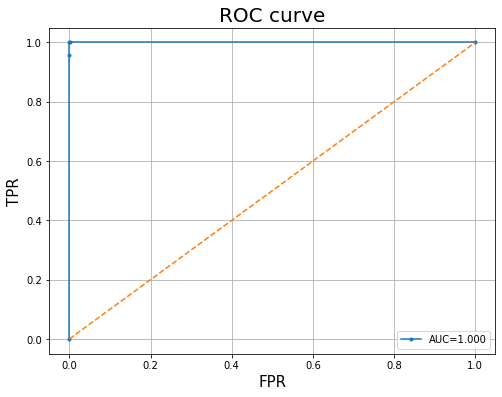

In [246]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test,y_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC curve', fontsize = 20)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.grid()
plt.legend(["AUC=%.3f"%auc])
plt.show()

In [247]:
# Saving the final model LightGBM as pickle file for the future use in productionizing the model
with open('final_model.pkl','wb') as fp:
    pickle.dump(lgbm, fp)